# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from CMEP import CMEP_Atom
from qsps import QSP_HNC
from constants import *
# from hnc_Ng import  HNC_solver
# from qsps import *

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
        
        
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Ha_to_J = 4.359744e-18
k_B = 1.380649e-23 
m_p = 1.672621898e-27 # kg
eV_to_K = 11604.5250061598
J_to_erg = 1e7
Ha_to_erg = Ha_to_J*J_to_erg

# Function that sets up HNC QSP 

## Load TCCW Cases

In [9]:
ni_cc = 0.99961457e22
Te_eV = 1
Ti_eV = 1
Z, A = 3, 1

atom = CMEP_Atom(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Z,
                     βu_options = {'add_bridge':True, 'pseudopotential':False}, 
                     qsp_options= {'r_c':0.0},
                     hnc_options= {'kappa_multiscale':10, 'R_max':50,'N_bins':5000},
                     hnc_solve_options={'alpha_Picard':1,'iters_to_wait':10,'verbose':True,'iters_to_use':5})
print(atom.qsp.Γ_matrix)
atom.run_onlyion_hnc()


Te_in_eV: 1.000
Ti_in_eV: 1.000
[[45.         -4.36751422]
 [-4.36751422  1.45527539]]
0: Initial condition Total Error: 8.182e+00
1: Change in c_r: 5.706e-01, HNC Error: 1.057e-02, Total Error: 2.985e+00
2: Change in c_r: 5.452e-01, HNC Error: 2.529e-02, Total Error: 1.646e+00
3: Change in c_r: 5.317e-01, HNC Error: 2.200e-02, Total Error: 1.100e+00
4: Change in c_r: 5.023e-01, HNC Error: 1.863e-02, Total Error: 8.179e-01
5: Change in c_r: 4.709e-01, HNC Error: 1.515e-02, Total Error: 6.354e-01
6: Change in c_r: 4.392e-01, HNC Error: 1.237e-02, Total Error: 5.072e-01
7: Change in c_r: 4.080e-01, HNC Error: 1.020e-02, Total Error: 4.130e-01
8: Change in c_r: 3.776e-01, HNC Error: 8.512e-03, Total Error: 3.414e-01
9: Change in c_r: 3.484e-01, HNC Error: 7.181e-03, Total Error: 2.857e-01
Starting Ng loop, using best index so far:  9
|d_n|^2 =  [24.634124155476314, 26.703518797565334, 28.850402935207736, 31.054821018333747, 33.29877293171396]
 αs:  [  64.53723452 -152.00259079  135.830076

In [202]:
# atom.onlyion_hnc.plot_species_convergence_ck(n_slices=len(atom.onlyion_hnc.tot_err_list))

In [203]:
# fig,ax = plt.subplots()

# def c_k_kinf(k, A, α, β, b):
#     return A *k**(-1)* np.exp(-α*k)*np.sin(β*k + b)

# start_ind = 100
# kinf_fit = curve_fit(c_k_kinf, atom.onlyion_hnc.k_array[start_ind:], atom.onlyion_hnc.c_k_matrix[0,0][start_ind:], p0=[100,0.1,4,0] )
# print(kinf_fit)
# ax.plot(atom.onlyion_hnc.k_array, atom.onlyion_hnc.c_k_matrix[0,0])
# ax.plot(atom.onlyion_hnc.k_array, atom.onlyion_hnc.c_s_k_matrix[0,0])
# ax.plot(atom.onlyion_hnc.k_array[start_ind:], c_k_kinf(atom.onlyion_hnc.k_array[start_ind:], *kinf_fit[0]))
# # ax.plot(atom.onlyion_hnc.k_array, c_k_kinf(atom.onlyion_hnc.k_array, *kinf_fit[0]))
# ax.set_yscale('symlog', linthresh=0.000001)
# # ax.set_xscale('log')
# ax.set_xlim(0,60)

[3.48022595 1.04174592 3.96474804 0.85545879]
[11.42936871]
[-0.21576624  0.57661517  1.36899658  2.161378    2.95375941  3.74614082
  4.53852223  5.33090365  6.12328506  6.91566647]


/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(-2.0, 2.0)

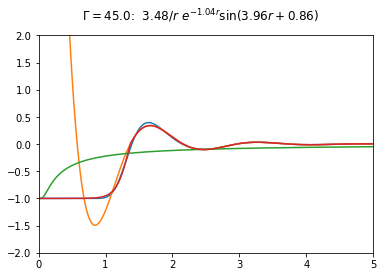

In [10]:
from scipy.optimize import curve_fit

def h_r_rinf(r, A, α, β, b):
    return A/r * np.exp(-α*r)*np.sin(β*r + b)
def h_r_r0(r, Γ):
    return -1 + np.exp(-Γ/r)
def h_r_rall(r, A, α, β, b):
    rinf_func = h_r_rinf(r, A, α, β, b)
    first_10_roots = (np.arange(10)*π-b)/β
    r0 = first_10_roots[2]
    print(first_10_roots)
    low_r_fit = -1 + 2/(1+np.exp(-10*(r-r0)))
    return np.where(r<r0, low_r_fit, rinf_func)  

rinf_fit = curve_fit(h_r_rinf, atom.onlyion_hnc.r_array[400:], atom.onlyion_hnc.h_r_matrix[0,0][400:], p0=[100,2,4,0] )
r0_fit   = curve_fit(h_r_r0, atom.onlyion_hnc.r_array[:50], atom.onlyion_hnc.h_r_matrix[0,0][:50], p0=[0.5] )
# rall_fit   = curve_fit(h_r_rall, atom.onlyion_hnc.r_array[:50], atom.onlyion_hnc.h_r_matrix[0,0][:50], p0=[0.5,1,*rinf_fit[0]] )
print(rinf_fit[0])
print(r0_fit[0])

fig,ax = plt.subplots()
fig.suptitle(r"$\Gamma={0:.1f}$:  ${1:.2f}/r \ e^{{-{2:.2f}r }}\sin({3:.2f}r + {4:.2f}) $".format(atom.qsp.Γ_matrix[0,0],*rinf_fit[0]))
ax.plot(atom.onlyion_hnc.r_array, atom.onlyion_hnc.h_r_matrix[0,0])

ax.plot(atom.onlyion_hnc.r_array, h_r_rinf(atom.onlyion_hnc.r_array, *rinf_fit[0]))
ax.plot(atom.onlyion_hnc.r_array, h_r_r0(atom.onlyion_hnc.r_array, 0.25))
ax.plot(atom.onlyion_hnc.r_array, h_r_rall(atom.onlyion_hnc.r_array,*rinf_fit[0]))

# ax.set_yscale('symlog', linthresh=0.00001)
# ax.set_xscale('log')
ax.set_xlim(0,5)
ax.set_ylim(-2,2)

(0.0, 60.0)

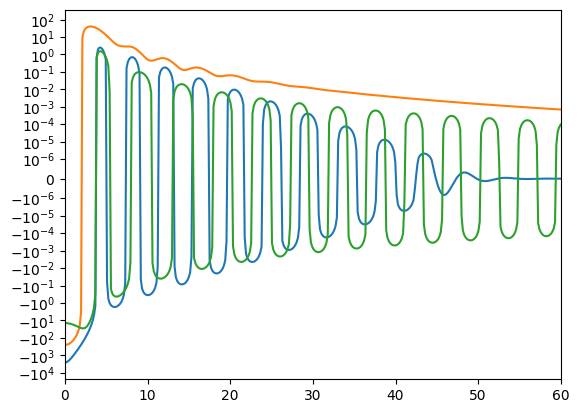

In [24]:
fig,ax = plt.subplots()

start_ind = 100

ax.plot(atom.onlyion_hnc.k_array, atom.onlyion_hnc.c_k_matrix[0,0])
ax.plot(atom.onlyion_hnc.k_array, atom.onlyion_hnc.c_s_k_matrix[0,0])
ax.plot(atom.onlyion_hnc.k_array, c_k)
# ax.plot(atom.onlyion_hnc.k_array, c_k_kinf(atom.onlyion_hnc.k_array, *kinf_fit[0]))
ax.set_yscale('symlog', linthresh=0.000001)
# ax.set_xscale('log')
ax.set_xlim(0,60)

In [35]:
h_r_guess = h_r_rall(atom.onlyion_hnc.r_array,*rinf_fit[0])
h_k = atom.hnc.FT_r_2_k(h_r_guess)

I_plus_h_rho_inverse = 1/(1 + h_k*atom.hnc.rho[0])
c_k = I_plus_h_rho_inverse * h_k

atom_test = CMEP_Atom(Z, A, ni_cc, Ti_eV, Te_eV, Zbar=Z,
                     βu_options = {'add_bridge':True, 'pseudopotential':False}, 
                     qsp_options= {'r_c':0.0},
                     hnc_options= {'kappa_multiscale':1, 'R_max':20,'N_bins':1000},
                     hnc_solve_options={'alpha_Picard':0.5,'iters_to_wait':10,'verbose':True,
                                        'iters_to_use':5,'num_iterations':0})


atom_test.run_onlyion_hnc()
atom_test.onlyion_hnc.initialize_guess_from_h_r(h_r_matrix = np.array([[h_r_guess]]))
atom_test.hnc_solve_options['num_iterations']=10
atom_test.onlyion_hnc.HNC_solve(**atom_test.hnc_solve_options)

[-7.85400966 -7.83556328 -7.8171169  -7.79867051 -7.78022413 -7.76177775
 -7.74333136 -7.72488498 -7.7064386  -7.68799221]
Te_in_eV: 1.000
Ti_in_eV: 1.000
0: Initial condition Total Error: 4.548e+00
1: Change in c_r: 2.452e+00, HNC Error: 3.739e-02, Total Error: 3.348e+00
Exiting status 1, reverting to best index so far: 1
Final iter:1, Total Error: 3.348e+00
0: Initial condition Total Error: inf
1: Change in c_r: 1.997e+05, HNC Error: inf, Total Error: inf
2: Change in c_r: 1.374e+04, HNC Error: inf, Total Error: inf
3: Change in c_r: 1.153e+04, HNC Error: inf, Total Error: inf
4: Change in c_r: 1.942e+04, HNC Error: inf, Total Error: inf
5: Change in c_r: 3.903e+02, HNC Error: inf, Total Error: inf
6: Change in c_r: 3.850e+02, HNC Error: inf, Total Error: inf
7: Change in c_r: 3.938e+02, HNC Error: inf, Total Error: inf
8: Change in c_r: 3.991e+02, HNC Error: inf, Total Error: inf
9: Change in c_r: 4.041e+02, HNC Error: inf, Total Error: inf
Starting Ng loop, using best index so far:

IndexError: index 0 is out of bounds for axis 0 with size 0

ZeroDivisionError: division by zero

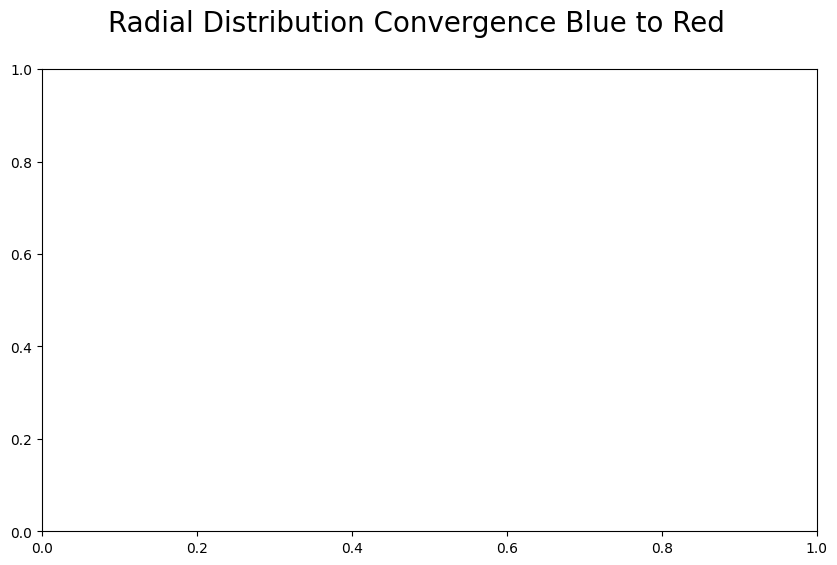

In [36]:
atom_test.onlyion_hnc.plot_species_convergence_g(n_slices=len(atom.onlyion_hnc.tot_err_list))

In [11]:
atom.get_effective_ion_cp()

0: Initial condition Total Error: 2.023e-01
Exiting status 0, reverting to best index so far: 147
Final iter:149, Total Error: 4.617e-07
0: Initial condition Total Error: 1.914e-01
Exiting status 0, reverting to best index so far: 146
Final iter:148, Total Error: 4.773e-07
0: Initial condition Total Error: 2.049e-01
Exiting status 0, reverting to best index so far: 147
Final iter:149, Total Error: 4.650e-07
0: Initial condition Total Error: 1.937e-01
Exiting status 0, reverting to best index so far: 146
Final iter:148, Total Error: 4.808e-07

_____________________________
Heat Capacity Results (Effective Ion Picture) 
c_p = 6.316e+03 [J/m^3/K] = 6.316e+04 [erg/cc/K]
c_p^ideal = 4.315e+03 [J/m^3/K] = 4.315e+04 [erg/cc/K]
c_v = 3.387e+03 [J/m^3/K] = 3.387e+04 [erg/cc/K]

γ = cp/cv = 1.865e+00

E/nkBT = 2.187, P/nkBT = 1.897 
cp/nkB = 3.660, cv/nkB = 1.962 

Total cv/nkB estimate (add ideal electrons):
c_v_tot_estimate = 1.689


In [ ]:
# r_c = 0.1
Heat Capacity Results 
c^e_v = 3.261e+03 [J/m^3/K], c^i_v  = 3.512e+04 [J/m^3/K] 
c_v = 3.838e+04 [J/m^3/K] 

c^e_v/(ne kB)= 0.279 , c^i_v/(ni kB)   = 1.390 
c_v/(n kB) = 1.039  

In [ ]:
# r_c = 0
Heat Capacity Results 
c^e_v = 1.864e+03 [J/m^3/K], c^i_v  = 3.508e+04 [J/m^3/K] 
c_v = 3.695e+04 [J/m^3/K] 

c^e_v/(ne kB)= 0.160 , c^i_v/(ni kB)   = 1.389 
c_v/(n kB) = 1.000 

In [6]:
atom.get_effective_ion_cp()

0: Initial condition Total Error: 2.440e-03
Exiting status 0, reverting to best index so far: 6
Final iter:8, Total Error: 5.909e-09
0: Initial condition Total Error: 4.382e-03
Exiting status 0, reverting to best index so far: 8
Final iter:10, Total Error: 6.985e-09
0: Initial condition Total Error: 4.456e-03
Exiting status 0, reverting to best index so far: 8
Final iter:10, Total Error: 8.409e-09
0: Initial condition Total Error: 2.368e-03
Exiting status 0, reverting to best index so far: 6
Final iter:8, Total Error: 5.476e-09

_____________________________
Heat Capacity Results (Effective Ion Picture) 
c_p = 3.103e+04 [J/m^3/K] = 3.103e+05 [erg/cc/K]
c_p^ideal = 2.071e+04 [J/m^3/K] = 2.071e+05 [erg/cc/K]
c_v = 1.801e+04 [J/m^3/K] = 1.801e+05 [erg/cc/K]

γ = cp/cv = 1.723e+00

E/nkBT = 2.027, P/nkBT = 1.637 
cp/nkB = 3.746, cv/nkB = 2.174 
Total cv/nkB estimate (add ideal electrons):
c_v_tot_estimate = 1.837
